In [1]:
import numpy as np
import pandas as pd

In [2]:
trans =  pd.DataFrame({"A":[12,4,5,None,1],
                       "B":[7,2,54,3,None],
                       "C":[20,16,11,3,8],
                       "D":[14,3,None,2,6]},
                      index=['Row_1','Row_2','Row_3','Row_4','Row_5'])

In [3]:
result = trans.transform(lambda x :x +10)
result

,A,B,C,D
Row_1,22.0,17.0,30,24.0
Row_2,14.0,12.0,26,13.0
Row_3,15.0,64.0,21,NaN
Row_4,NaN,13.0,13,12.0
Row_5,11.0,NaN,18,16.0


In [4]:
x = np.random.randint(10,200, size=10)
x

array([ 39, 117, 146, 165,  62,  52, 166,  53, 172,  65])

In [5]:
np.digitize(x,bins=[50])

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [6]:
np.digitize(x, bins=[50,100])

array([0, 2, 2, 2, 1, 1, 2, 1, 2, 1], dtype=int64)

In [7]:
df = pd.DataFrame({"height": x})
df

,height
0,39
1,117
2,146
3,165
4,62
5,52
6,166
7,53
8,172
9,65


In [8]:
df['binned'] = pd.cut(x=df['height'], bins=[0,25,50,100,200])
df

,height,binned
0,39,"(25, 50]"
1,117,"(100, 200]"
2,146,"(100, 200]"
3,165,"(100, 200]"
4,62,"(50, 100]"
5,52,"(50, 100]"
6,166,"(100, 200]"
7,53,"(50, 100]"
8,172,"(100, 200]"
9,65,"(50, 100]"


In [9]:
df['bin_label']  = pd.cut(x= df['height'],
                          bins =[0,25,50,100,200],
                          labels = [1,2,3,4])
df

,height,binned,bin_label
0,39,"(25, 50]",2
1,117,"(100, 200]",4
2,146,"(100, 200]",4
3,165,"(100, 200]",4
4,62,"(50, 100]",3
5,52,"(50, 100]",3
6,166,"(100, 200]",4
7,53,"(50, 100]",3
8,172,"(100, 200]",4
9,65,"(50, 100]",3


In [10]:
pd.qcut(df['height'], q=5)

0    (38.999, 52.8]
1     (63.8, 128.6]
2    (128.6, 165.2]
3    (128.6, 165.2]
4      (52.8, 63.8]
5    (38.999, 52.8]
6    (165.2, 172.0]
7      (52.8, 63.8]
8    (165.2, 172.0]
9     (63.8, 128.6]
Name: height, dtype: category
Categories (5, interval[float64, right]): [(38.999, 52.8] < (52.8, 63.8] < (63.8, 128.6] < (128.6, 165.2] < (165.2, 172.0]]

In [12]:
degrees = ["none", "cum laude","magna laude","summa cum laude"]
student_results = [3.93,3.24,2.80,2.83,3.91,3.698,3.731,3.25,3.24,3.82,3.22]
student_results.sort(reverse=True)
student_results_degrees =pd.cut(student_results, [0,3.6,3.8,3.9,4.0], labels= degrees)
honor = pd.DataFrame({'grades': student_results,
                      'honors':student_results_degrees})

honor

,grades,honors
0,3.930,summa cum laude
1,3.910,summa cum laude
2,3.820,magna laude
3,3.731,cum laude
4,3.698,cum laude
5,3.250,none
6,3.240,none
7,3.240,none
8,3.220,none
9,2.830,none


<Axes: >

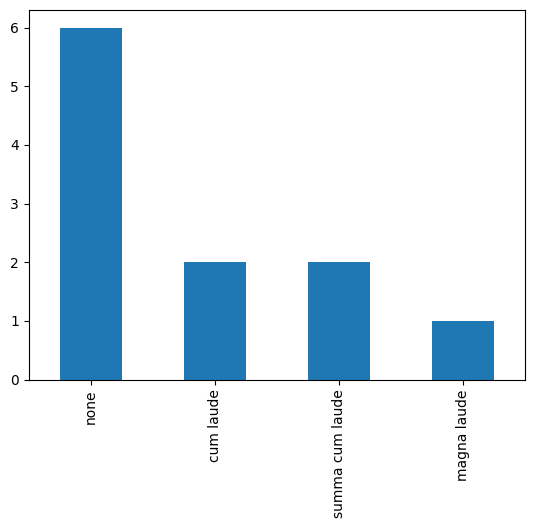

In [13]:
pd.value_counts(student_results_degrees).plot.bar()